In [1]:
#Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import json

from config import (
    consumer_key, 
    consumer_secret, 
    access_token, 
    access_secret
)

In [2]:
#Import and intialize the sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
#Define the Twitter API keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_secret = access_secret

In [4]:
#Set up Tweepy authorization
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# News organizations we will analyze (selecting BBC North America to align to the U.S.-based news orgs)
news_orgs = ("@BBCNorthAmerica", "@CBSNews","@CNN", "@FoxNews", "@nytimes")

In [6]:
#Create a counter
counter = 1

#Create a list of variables for holding the sentiment scores
sentiment_results = []

#Create a variable for the oldest tweet
oldest_tweet = None

#Loop through most recent 100 tweets for each news org
for org in news_orgs:
    
    #Create a counter
    #counter = 1
    
    #Get tweets from each news org Home feed
    public_tweets = api.user_timeline(org,
                                      count=100,
                                      max_id = oldest_tweet)
        
    #Loop through each tweet
    for tweet in public_tweets:
        
        #Run analysis on each tweet and create lists to hold sentiment results
        tweet_text = tweet["text"]
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
            

        sentiment_results.append({
            "Prior Tweet #": counter,
            "News Org.": org, 
            "Date": tweet["created_at"],
            "Compound": compound,
            "Positive": pos, 
            "Neutral": neu,
            "Negative": neg,
            "Analyzed Tweet": tweet_text,
        })
        
        #Add to counter
        counter = counter + 1

In [7]:
#Place sentiments into a dataframe
sentiments_df = pd.DataFrame.from_dict(sentiment_results)

# Export the new CSV
sentiments_df.to_csv("Sentiment_Analysis_News_Orgs.csv", index=False)

sentiments_df.head()

,Analyzed Tweet,Compound,Date,Negative,Neutral,News Org.,Positive,Prior Tweet #
0,US hits Turkish ministers with sanctions over ...,0.0000,Wed Aug 01 19:03:12 +0000 2018,0.000,1.000,@BBCNorthAmerica,0.0,1
1,McDonald's serves pregnant Canadian cleaning f...,0.0000,Wed Aug 01 18:45:58 +0000 2018,0.000,1.000,@BBCNorthAmerica,0.0,2
2,Trump demands Russia probe end 'right now' htt...,0.0000,Wed Aug 01 16:16:34 +0000 2018,0.000,1.000,@BBCNorthAmerica,0.0,3
3,RT @rituprasad92: A US gun advocacy group want...,-0.7184,Wed Aug 01 16:10:31 +0000 2018,0.280,0.720,@BBCNorthAmerica,0.0,4
4,Canada's Ontario government cuts basic income ...,-0.2960,Wed Aug 01 16:01:58 +0000 2018,0.216,0.784,@BBCNorthAmerica,0.0,5


In [8]:
sentiments_df = sentiments_df[["Prior Tweet #","News Org.", "Date", "Compound", "Positive", "Neutral", "Negative", "Analyzed Tweet"]]

sentiments_df.head()

,Prior Tweet #,News Org.,Date,Compound,Positive,Neutral,Negative,Analyzed Tweet
0,1,@BBCNorthAmerica,Wed Aug 01 19:03:12 +0000 2018,0.0000,0.0,1.000,0.000,US hits Turkish ministers with sanctions over ...
1,2,@BBCNorthAmerica,Wed Aug 01 18:45:58 +0000 2018,0.0000,0.0,1.000,0.000,McDonald's serves pregnant Canadian cleaning f...
2,3,@BBCNorthAmerica,Wed Aug 01 16:16:34 +0000 2018,0.0000,0.0,1.000,0.000,Trump demands Russia probe end 'right now' htt...
3,4,@BBCNorthAmerica,Wed Aug 01 16:10:31 +0000 2018,-0.7184,0.0,0.720,0.280,RT @rituprasad92: A US gun advocacy group want...
4,5,@BBCNorthAmerica,Wed Aug 01 16:01:58 +0000 2018,-0.2960,0.0,0.784,0.216,Canada's Ontario government cuts basic income ...


In [9]:
# Create separate data frames per news org
BBC_df = sentiments_df.loc[(sentiments_df["News Org."] == "@BBCNorthAmerica")]
CBS_df = sentiments_df.loc[(sentiments_df["News Org."] == "@CBSNews")]
CNN_df = sentiments_df.loc[(sentiments_df["News Org."] == "@CNN")]
Fox_df = sentiments_df.loc[(sentiments_df["News Org."] == "@FoxNews")]
NYT_df = sentiments_df.loc[(sentiments_df["News Org."] == "@nytimes")]

CBS_df

##Create groupbys
##BBC_group = BBC_df.groupby(["Compound"])["Date"]
##CBS_group = CBS_df.groupby(["Compound"])["Date"]
##CNN_group = CNN_df.groupby(["Compound"])["Date"]
##Fox_group = Fox_df.groupby(["Compound"])["Date"]
##NYT_group = NYT_df.groupby(["Compound"])["Date"]

,Prior Tweet #,News Org.,Date,Compound,Positive,Neutral,Negative,Analyzed Tweet
100,101,@CBSNews,Wed Aug 01 21:14:31 +0000 2018,-0.2263,0.000,0.894,0.106,"Walmart, the nation's largest private employer..."
101,102,@CBSNews,Wed Aug 01 21:01:22 +0000 2018,0.2732,0.200,0.667,0.133,WATCH: Rescuers find dog that survived wildfir...
102,103,@CBSNews,Wed Aug 01 20:40:39 +0000 2018,-0.7845,0.000,0.615,0.385,Harrisburg Diocese identifies 71 alleged sex a...
103,104,@CBSNews,Wed Aug 01 20:38:10 +0000 2018,-0.7269,0.000,0.747,0.253,RT @CBSThisMorning: New video shows the terrif...
104,105,@CBSNews,Wed Aug 01 20:34:35 +0000 2018,-0.8126,0.000,0.598,0.402,Russian reporters working on investigation wit...
105,106,@CBSNews,Wed Aug 01 20:20:00 +0000 2018,-0.5423,0.063,0.741,0.196,"Former waitress anonymously sends $1,000 and a..."
106,107,@CBSNews,Wed Aug 01 20:04:49 +0000 2018,-0.6705,0.000,0.703,0.297,The dirt on the ground is making climate chang...
107,108,@CBSNews,Wed Aug 01 19:49:42 +0000 2018,0.0000,0.000,1.000,0.000,Former President Barack Obama is jumping back ...
108,109,@CBSNews,Wed Aug 01 19:35:00 +0000 2018,-0.6486,0.000,0.751,0.249,Conspiracy theorist Alex Jones wants a Texas j...
109,110,@CBSNews,Wed Aug 01 19:20:59 +0000 2018,0.0000,0.000,1.000,0.000,WATCH: This official in Connecticut kneeled du...


In [10]:
##Cast groupbys back to dataframes
##BBC_compound_group_df = pd.DataFrame(BBC_group["Date"])
##CBS_compound_group_df = pd.DataFrame(CBS_group["Date"])
##CNN_compound_group_df = pd.DataFrame(CNN_group["Date"])
##Fox_compound_group_df = pd.DataFrame(Fox_group["Date"])
##NYT_compound_group_df = pd.DataFrame(NYT_group["Date"])


###FOR CHARLA: international_duration = pd.DataFrame(grouped_international_data["duration (seconds)"].sum())


In [11]:
#Plot Compound score of individual tweets per news organization
##plt.figure(figsize =(10,10))
##plt.rcParams["axes.facecolor"] = "white"
##plt.rcParams["savefig.facecolor"] = "white"
##ax.grid(linewidth = "0.5", linestyle = "-", color = "grey")

##plt.scatter(BBC_compound_group_df["Prior Tweet #"], BBC_compound_group_df["Compound"], label = "BBC", color = "firebrick")
##plt.scatter(CBS_compound_group_df["Prior Tweet #"], CBS_compound_group_df["Compound"], label = "CBS", color = "black")
##plt.scatter(CNN_compound_group_df["Prior Tweet #"], CNN_compound_group_df["Compound"], label = "CNN", color = "red")
##plt.scatter(Fox_compound_group_df["Prior Tweet #"], Fox_compound_group_df["Compound"], label = "Fox", color = "darkblue")
##plt.scatter(NYT_compound_group_df["Prior Tweet #"], NYT_compound_group_df["Compound"], label = "NYT", color = "darkgrey")


##plt.xlabel("Most Recent 100 Tweets")
##plt.ylabel("Sentiment Score")
##plt.title("Are the Tweets of Big 5 News Media Positive, Negative, or Neutral?")


##plt.legend(loc = "upper right")

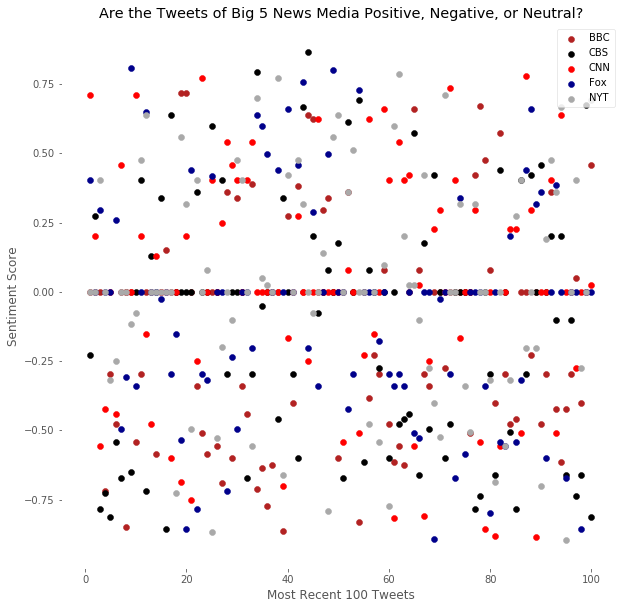

In [12]:
#Plot Compound score of individual tweets per news organization
plt.figure(figsize =(10,10))
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["savefig.facecolor"] = "white"
#ax.grid(linewidth = "0.5", linestyle = "-", color = "grey")

plt.scatter(BBC_df["Prior Tweet #"], BBC_df["Compound"], label = "BBC", color = "firebrick")
plt.scatter(BBC_df["Prior Tweet #"], CBS_df["Compound"], label = "CBS", color = "black")
plt.scatter(BBC_df["Prior Tweet #"], CNN_df["Compound"], label = "CNN", color = "red")
plt.scatter(BBC_df["Prior Tweet #"], Fox_df["Compound"], label = "Fox", color = "darkblue")
plt.scatter(BBC_df["Prior Tweet #"], NYT_df["Compound"], label = "NYT", color = "darkgrey")


plt.xlabel("Most Recent 100 Tweets")
plt.ylabel("Sentiment Score")
plt.title("Are the Tweets of Big 5 News Media Positive, Negative, or Neutral?")


plt.legend(loc = "upper right")

In [13]:
# Along with looking at individual tweets, make a dataframe for the overall Compound score per news org
avg_sentiments_group = sentiments_df.groupby(["News Org."])["Compound"].mean()

avg_sentiments_group

News Org.
@BBCNorthAmerica   -0.131586
@CBSNews           -0.100073
@CNN                0.004876
@FoxNews           -0.051554
@nytimes            0.018301
Name: Compound, dtype: float64

In [14]:
avg_sentiments_df = pd.DataFrame(avg_sentiments_group)
##avg_sentiments_df["Compound"] = avg_sentiments_df["Compound"].map("{:.2f}".format)

avg_sentiments_df

,Compound
News Org.,
@BBCNorthAmerica,-0.131586
@CBSNews,-0.100073
@CNN,0.004876
@FoxNews,-0.051554
@nytimes,0.018301


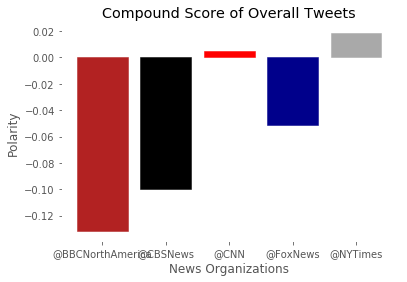

In [24]:
barlist = plt.bar(["@BBCNorthAmerica", "@CBSNews", "@CNN", "@FoxNews", "@NYTimes"], avg_sentiments_df["Compound"])
barlist[0].set_color("firebrick")
barlist[1].set_color("black")
barlist[2].set_color("red")
barlist[3].set_color("darkblue")
barlist[4].set_color("darkgrey")

plt.xlabel("News Organizations")
plt.ylabel("Polarity")
plt.title("Compound Score of Overall Tweets")
plt.show()